In [18]:
import glob
import json
import pickle
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook

from requests import get
from bs4 import BeautifulSoup

In [2]:
themes = pd.concat([pd.read_csv(f, compression='gzip') for f in glob.glob("../data/themes/*.gzip")], ignore_index=True)

In [3]:
themes

,Themes
0,SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...
1,LEADER;TAX_FNCACT;TAX_FNCACT_PRESIDENT;USPEC_P...
2,TAX_WORLDLANGUAGES;TAX_WORLDLANGUAGES_RUSSIA;T...
3,UNGP_FORESTS_RIVERS_OCEANS;ENV_CLIMATECHANGE;U...
4,SECURITY_SERVICES;TAX_FNCACT;TAX_FNCACT_POLICE...
5,RESIGNATION;EPU_POLICY;EPU_POLICY_WHITE_HOUSE;...
6,TRIAL;CORRUPTION;WB_2019_ANTI_CORRUPTION_LEGIS...
7,PROTEST;SECURITY_SERVICES;TAX_FNCACT;TAX_FNCAC...
8,NATURAL_DISASTER;NATURAL_DISASTER_HURRICANE;CR...
9,TAX_POLITICAL_PARTY;TAX_POLITICAL_PARTY_REPUBL...


In [4]:
tags_social = "DISABILITY|DISCRIMINATION|EDUCATION|GENDERVIOLENCE|GENTRIFICATION|HARASSMENT|HATE_SPEECH|IMMIGRATION|LGBT|MEDICAL_SECURITY|MOVEMENT_SOCIAL|PROTEST|REFUGEES|UNEMPLOYMENT|UNREST_POLICEBRUTALITY"
ind_social = themes.Themes.str.contains(tags_social)

with open("../data/indices/social.pkl", "wb") as f:
    pickle.dump(themes[ind_social].index.values, f)

In [34]:
tags_conflict = "ARMEDCONFLICT|ARREST|ASSASSINATION|CEASEFIRE|CRIME_|DRUG_TRADE|FIRE_ARM_OWNERSHIP|HUMAN_TRAFFICKING|JIHAD|KIDNAP|KILL|MILITARY|ORGANIZED_CRIME|POLITICAL_|SUICIDE_ATTACK|SURVEILLANCE|TAX_CARTELS|TAX_TERROR_GROUP|TERROR|TORTURE"
ind_conflict = themes.Themes.str.contains(tags_conflict)

with open("../data/indices/conflict.pkl", "wb") as f:
    pickle.dump(themes[ind_conflict].index.values, f)

In [35]:
tags_env = "AGRICULTURE|ENV_|MOVEMENT_ENVIRONMENTAL|NATURAL_DISASTER"
ind_env = themes.Themes.str.contains(tags_env)

with open("../data/indices/env.pkl", "wb") as f:
    pickle.dump(themes[ind_env].index.values, f)

In [36]:
tags_health = "FOOD_SECURITY|GENERAL_HEALTH|HEALTH_|MEDICAL|TAX_DISEASE"
ind_health = themes.Themes.str.contains(tags_health)

with open("../data/indices/health.pkl", "wb") as f:
    pickle.dump(themes[ind_health].index.values, f)

In [37]:
tags_eco = "AUSTERITY|BLACK_MARKET|ECON_|FUELPRICES"
ind_eco = themes.Themes.str.contains(tags_eco)

with open("../data/indices/eco.pkl", "wb") as f:
    pickle.dump(themes[ind_eco].index.values, f)

In [2]:
with open("../data/indices/social.pkl", "rb") as f:
    ind_social = pickle.load(f)
with open("../data/indices/conflict.pkl", "rb") as f:
    ind_conflict = pickle.load(f)
with open("../data/indices/env.pkl", "rb") as f:
    ind_env = pickle.load(f)
with open("../data/indices/health.pkl", "rb") as f:
    ind_health = pickle.load(f)
with open("../data/indices/eco.pkl", "rb") as f:
    ind_eco = pickle.load(f)

In [2]:
full_df = pd.concat([pd.read_csv(f, compression='gzip', usecols=[0,1,2,3,4]) for f in glob.glob("../data/full-data/*.gzip")], ignore_index=True)
full_df

,GLOBALEVENTID,MentionSourceName,DocumentIdentifier,DATE,V2Tone
0,714712065,npr.org,https://www.npr.org/podcasts/510318/up-first,20171213163000,"-1.51745068285281,1.97268588770865,3.490136570..."
1,714694876,npr.org,https://www.npr.org/podcasts/510318/up-first,20171213163000,"-1.51745068285281,1.97268588770865,3.490136570..."
2,714914448,npr.org,https://www.npr.org/podcasts/510318/up-first,20171213163000,"-1.51745068285281,1.97268588770865,3.490136570..."
3,714914794,npr.org,https://www.npr.org/podcasts/510318/up-first,20171213163000,"-1.51745068285281,1.97268588770865,3.490136570..."
4,714913892,npr.org,https://www.npr.org/podcasts/510318/up-first,20171213163000,"-1.51745068285281,1.97268588770865,3.490136570..."
5,714694328,npr.org,https://www.npr.org/podcasts/510318/up-first,20171213163000,"-1.51745068285281,1.97268588770865,3.490136570..."
6,721613923,npr.org,https://www.npr.org/series/473636949/schoolmoney,20180111203000,"0,3.18471337579618,3.18471337579618,6.36942675..."
7,771525591,npr.org,https://www.npr.org/podcasts/381444767/u-w-m-t...,20180712174500,"-1.00090991810737,1.45586897179254,2.456778889..."
8,771526954,npr.org,https://www.npr.org/podcasts/381444767/u-w-m-t...,20180712174500,"-1.00090991810737,1.45586897179254,2.456778889..."
9,733479049,npr.org,https://www.npr.org/series/347174484/jazz-nigh...,20180223211500,"1.26742712294043,3.80228136882129,2.5348542458..."


In [3]:
# distribution of nb of articles by sources
nb_articles = full_df.groupby("MentionSourceName").size()
nb_articles.describe()

count        50.000000
mean     118257.800000
std      125279.132072
min        1528.000000
25%       20088.000000
50%       71474.500000
75%      171119.000000
max      436592.000000
dtype: float64

In [4]:
nb_articles.sort_values(ascending=False)

MentionSourceName
nbcnews.com            436592
seattletimes.com       410271
miamiherald.com        389190
foxnews.com            380452
stltoday.com           365876
seattlepi.com          325135
nytimes.com            297310
nydailynews.com        281437
chicagotribune.com     237356
wtop.com               197579
latimes.com            196600
bostonherald.com       184029
newsweek.com           172584
newsmax.com            166724
breitbart.com          152387
philly.com             151145
politico.com           150017
usatoday.com           149436
cbsnews.com            116578
huffingtonpost.com     114562
nypost.com             112917
abc13.com               91645
npr.org                 89619
abc7news.com            83612
newsday.com             82466
boston.com              60483
mercurynews.com         53289
ktla.com                50253
denverpost.com          43968
fox2now.com             42273
kron4.com               32681
wgntv.com               30834
kdvr.com              

In [5]:
sources = nb_articles.sort_values(ascending=False).index.values

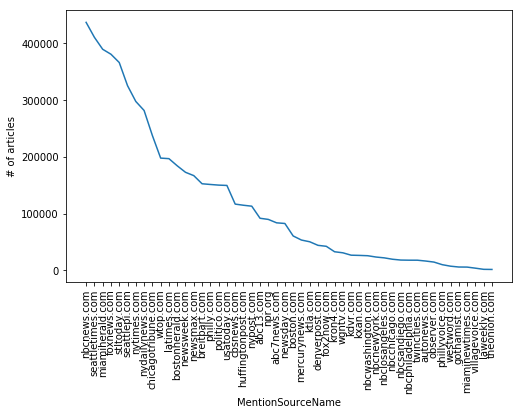

In [6]:
plt.figure(figsize=(8,5))
nb_articles.sort_values(ascending=False).plot()
plt.xticks(range(len(sources)), sources, rotation=90)
plt.ylabel("# of articles")
plt.show()

In [12]:
full_df["month"] = pd.to_datetime(full_df.DATE, format='%Y%m%d%H%M%S').dt.month

In [7]:
with open("../data/sources/map_sources_url_to_name.pkl", "rb") as f:
    name_map = pickle.load(f)

In [8]:
def get_icon(website, errors):
    possible = ["shortcut icon", "icon", "Shortcut Icon"]
    my_header = {'user-agent': "Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:63.0) Gecko/20100101 Firefox/63.0",}
    url = "http://"+website
    try:
        r = get(url, headers=my_header)
        soup = BeautifulSoup(r.text, 'html.parser')
        icon_link = None
        i = 0
        while icon_link is None:
            icon_link = soup.find("link", rel=possible[i])
            i+=1
        try:
            icon = get(icon_link['href'], headers=my_header)
            url = icon_link['href']
        except:
            icon = get(url + icon_link['href'], headers=my_header)
            url += icon_link['href']
        return url
    except:
        errors.append(website)

In [13]:
icon_map = {}
errors_icon = []

for s in tqdm_notebook(sources):
    icon_map[s] = get_icon(s, errors_icon)
    
icon_map["npr.org"] = "https://media.npr.org/templates/favicon/favicon-32x32.png"
icon_map["http://chicagotribune.com"] = "https://s.m.huffpost.com/assets/favicon-2020e123c064086aad150fe909c53771f862d7c76cd62f6146e81d533845fd7d.ico"

In [9]:
events_covered = full_df.groupby("MentionSourceName")["GLOBALEVENTID"].unique()

In [10]:
full_df["avg_tone"] = full_df.V2Tone.map(lambda l : str(l).split(",")[0]).astype(float)

In [11]:
avg_tone_by_source_x_event = full_df.groupby(["MentionSourceName","GLOBALEVENTID"]).mean()["avg_tone"]

In [14]:
avg_tone_by_source_x_event.groupby(level=0).mean()

MentionSourceName
abc13.com             -3.334772
abc7news.com          -2.969037
autonews.com          -1.006196
boston.com            -2.692976
bostonherald.com      -3.403738
breitbart.com         -3.179456
cbsnews.com           -3.204251
chicagotribune.com    -2.303082
denverpost.com        -2.821336
fox2now.com           -3.608734
foxnews.com           -3.877396
gothamist.com         -2.568703
huffingtonpost.com    -2.784874
kdvr.com              -3.295040
kron4.com             -3.842148
ktla.com              -3.698068
kxan.com              -3.073968
latimes.com           -2.570441
laweekly.com           0.129231
mercurynews.com       -2.834040
miamiherald.com       -3.067096
miaminewtimes.com     -1.789102
nbcchicago.com        -3.503078
nbclosangeles.com     -3.442892
nbcnews.com           -2.833546
nbcnewyork.com        -3.747602
nbcphiladelphia.com   -3.787222
nbcsandiego.com       -3.409233
nbcwashington.com     -3.371963
newsday.com           -2.570273
newsmax.com           

In [28]:
theme_df = full_df

for month in tqdm_notebook(range(13)):
    directory = "../data/all/"+str(month)
    if not os.path.exists(directory):
        os.makedirs(directory)

    if month == 0:
        df = theme_df.copy()
    else:
        df = theme_df[theme_df.month==month].copy()
        
    sources = df["MentionSourceName"].unique()

    events_covered = df.groupby("MentionSourceName")["GLOBALEVENTID"].unique()

    df["avg_tone"] = df.V2Tone.map(lambda l : str(l).split(",")[0]).astype(float)

    avg_tone_by_source_x_event = df.groupby(["MentionSourceName","GLOBALEVENTID"]).mean()["avg_tone"]

    nodes = []
    edges = []
    new_sources = set(sources)
        
    for source1 in sources:
        nodes.append({  'id' : source1, 
                        'size' : int(nb_articles[source1]), 
                        'name' : name_map[source1],
                        'favicon' : icon_map[source1],
                        'avg_tone' : avg_tone_by_source_x_event[source1].mean(),
                     })

        events1 = set(events_covered[source1])
        new_sources = new_sources - {source1}

        for source2 in new_sources:
            if source1==source2:
                continue

            events2 = set(events_covered[source2])
            # union
            #coverage_ratio = len(events1 & events2) / len(events1 | events2)

            # sqrt
            #coverage_ratio = len(events1 & events2) / np.sqrt(len(events1) * len(events2))

            # min
            coverage_ratio = len(events1 & events2) / min(len(events1), len(events2))

            tone_diff = np.abs(avg_tone_by_source_x_event[source1]-avg_tone_by_source_x_event[source2]).dropna().mean()

            edges.append({'source': source1, 'target': source2, 'weight': coverage_ratio, 'tone_diff': tone_diff})  

    for i in np.arange(0,0.201,0.005):
        threshold = i
        filtered_edges = [ e for e in edges if e['weight'] > threshold ]
        network = {'nodes': nodes, 'edges': filtered_edges}

        filename = "/threshold_"+str(int(threshold*1000))+"_permille.json"

        with open(directory+filename, "w") as f:
            json.dump(network, f, indent=2)

In [25]:
theme_list = [ "social", "conflict", "env", "health", "eco" ]
for theme in tqdm_notebook(theme_list):
    
    with open("../data/indices/"+theme+".pkl", "rb") as f:
        ind = pickle.load(f)
    theme_df = full_df.loc[ind]
    
    for month in tqdm_notebook(range(13)):
        directory = "../data/"+theme+"/"+str(month)
        if not os.path.exists(directory):
            os.makedirs(directory)
            
        if month == 0:
            df = theme_df.copy()
        else:
            df = theme_df[theme_df.month==month].copy()
        
        sources = df["MentionSourceName"].unique()
        
        events_covered = df.groupby("MentionSourceName")["GLOBALEVENTID"].unique()

        df["avg_tone"] = df.V2Tone.map(lambda l : str(l).split(",")[0]).astype(float)

        avg_tone_by_source_x_event = df.groupby(["MentionSourceName","GLOBALEVENTID"]).mean()["avg_tone"]

        nodes = []
        edges = []
        new_sources = set(sources)

        for source1 in sources:
            nodes.append({  'id' : source1, 
                            'size' : int(nb_articles[source1]), 
                            'name' : name_map[source1],
                            'favicon' : icon_map[source1],
                            'avg_tone' : avg_tone_by_source_x_event[source1].mean(),
                         })

            events1 = set(events_covered[source1])
            new_sources = new_sources - {source1}

            for source2 in new_sources:
                if source1==source2:
                    continue

                events2 = set(events_covered[source2])
                # union
                #coverage_ratio = len(events1 & events2) / len(events1 | events2)

                # sqrt
                #coverage_ratio = len(events1 & events2) / np.sqrt(len(events1) * len(events2))

                # min
                coverage_ratio = len(events1 & events2) / min(len(events1), len(events2))

                tone_diff = np.abs(avg_tone_by_source_x_event[source1]-avg_tone_by_source_x_event[source2]).dropna().mean()

                edges.append({'source': source1, 'target': source2, 'weight': coverage_ratio, 'tone_diff': tone_diff})  

        for i in np.arange(0,0.201,0.005):
            threshold = i
            filtered_edges = [ e for e in edges if e['weight'] > threshold ]
            network = {'nodes': nodes, 'edges': filtered_edges}
            
            filename = "/threshold_"+str(int(threshold*1000))+"_permille.json"
                
            with open(directory+filename, "w") as f:
                json.dump(network, f, indent=2)

In [38]:
theme_size=[]
for theme in theme_list:
    with open("../data/indices/"+theme+".pkl", "rb") as f:
        ind = pickle.load(f)
    theme_size.append((theme, len(ind)))

In [53]:
theme_size

[('social', 3201224),
 ('conflict', 4819972),
 ('env', 1292497),
 ('health', 2454579),
 ('eco', 1612163)]

In [54]:
theme_size.sort(key=lambda tup: tup[1], reverse=True)

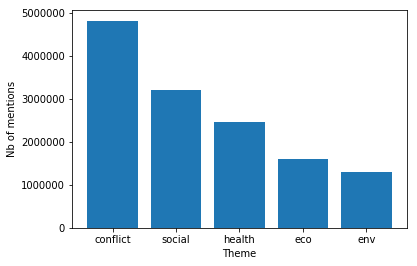

In [55]:
plt.bar(list(zip(*theme_size))[0],list(zip(*theme_size))[1])
plt.xlabel('Theme')
plt.ylabel('Nb of mentions')
plt.show()